##### CBOW 모델의 신경망 구성

In [10]:
#ch03 폴더의 simple_cbow.py 파일에 있는 내용임.

#1. 초기화 method
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss

class SimpleCBOW:
    def __init__(self, voacb_size, hidden_size):  #인수로 어휘 수(vocab_size), 은닉층 뉴런 수(hidden_size) 받음.
        V, H = vocab_size, hidden_size
        
        #가중치 초기화: 각각 작은 무작위 값으로 초기화됨.
        W_in = 0.01 * np.random.randn(V, H).astype('f')  #astype('f'): 32비트 부동소수점 수로 초기화
        W_out = 0.01 * np.random.randn(H, V).astype('f')
        
        #계층 생성
        self.in_layer0 = MatMul(W_in)   #input layer의 MatMul 계층은 맥락에서 사용하는 단어의 수(window size)만큼 만들어야 한다.
        self.in_layer1 = Matmul(W_in)   #input layer의 MatMul 계층은 모두 같은 가중치를 이용해야 한다.
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss() #
        
        #모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads  += layer.grads
            
        #인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in
        
#2. 신경망의 순전파인 forward() method

    def forward(self, contexts, target):    #맥락(contexts), 타깃(target)을 받아 손실(loss)을 반환.
        h0 = self.in_layer0.forward(contexts[:, 0]) #contexts는 3차원 넘파이 배열이라고 가정.
        h1 = self.in_layer1.forward(contexts[:, 1])
        h  = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss  = self.loss_layer.forwar(score, target)
        return loss
    
#3. 역전파 backward() method 구현
#역전파는 기울기를 순전파 때와는 반대 전파.
#이 모델에서 역전파는 '1'에서 시작하여 곧바로 Softmax with Loss 계층에 입력됨
#Softmax with Loss 계층의 역전파 출력 = ds
#ds를 output layer MatMul 계층에 입력한다.
# *는 순전파 시의 입력을 서로 바꿔 기울기에 곱하고, +는 기울기를 그대로 통과시킴.

    def backward(self, dout = 1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer1.backward(da)
        return None

#### 3-4-1. 학습 코드 구현

In [14]:
#matplotlib로 한글 폰트 설정

import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system...')
    
#그래프가 외부창에서 그려짐.
%matplotlib inline

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.93
| 에폭 26 |

| 에폭 279 |  반복 1 / 2 | 시간 0[s] | 손실 1.00
| 에폭 280 |  반복 1 / 2 | 시간 0[s] | 손실 1.12
| 에폭 281 |  반복 1 / 2 | 시간 0[s] | 손실 1.08
| 에폭 282 |  반복 1 / 2 | 시간 0[s] | 손실 1.00
| 에폭 283 |  반복 1 / 2 | 시간 0[s] | 손실 1.17
| 에폭 284 |  반복 1 / 2 | 시간 0[s] | 손실 1.11
| 에폭 285 |  반복 1 / 2 | 시간 0[s] | 손실 1.08
| 에폭 286 |  반복 1 / 2 | 시간 0[s] | 손실 1.09
| 에폭 287 |  반복 1 / 2 | 시간 0[s] | 손실 0.98
| 에폭 288 |  반복 1 / 2 | 시간 0[s] | 손실 1.18
| 에폭 289 |  반복 1 / 2 | 시간 0[s] | 손실 1.08
| 에폭 290 |  반복 1 / 2 | 시간 0[s] | 손실 1.07
| 에폭 291 |  반복 1 / 2 | 시간 0[s] | 손실 1.00
| 에폭 292 |  반복 1 / 2 | 시간 0[s] | 손실 1.17
| 에폭 293 |  반복 1 / 2 | 시간 0[s] | 손실 1.17
| 에폭 294 |  반복 1 / 2 | 시간 0[s] | 손실 0.98
| 에폭 295 |  반복 1 / 2 | 시간 0[s] | 손실 0.97
| 에폭 296 |  반복 1 / 2 | 시간 0[s] | 손실 1.27
| 에폭 297 |  반복 1 / 2 | 시간 0[s] | 손실 0.98
| 에폭 298 |  반복 1 / 2 | 시간 0[s] | 손실 1.07
| 에폭 299 |  반복 1 / 2 | 시간 0[s] | 손실 1.06
| 에폭 300 |  반복 1 / 2 | 시간 0[s] | 손실 1.18
| 에폭 301 |  반복 1 / 2 | 시간 0[s] | 손실 0.96
| 에폭 302 |  반복 1 / 2 | 시간 0[s] | 손실 0.97
| 에폭 303 |  반복 1

| 에폭 574 |  반복 1 / 2 | 시간 0[s] | 손실 0.93
| 에폭 575 |  반복 1 / 2 | 시간 0[s] | 손실 0.83
| 에폭 576 |  반복 1 / 2 | 시간 0[s] | 손실 0.91
| 에폭 577 |  반복 1 / 2 | 시간 0[s] | 손실 0.95
| 에폭 578 |  반복 1 / 2 | 시간 0[s] | 손실 0.91
| 에폭 579 |  반복 1 / 2 | 시간 0[s] | 손실 0.79
| 에폭 580 |  반복 1 / 2 | 시간 0[s] | 손실 1.17
| 에폭 581 |  반복 1 / 2 | 시간 0[s] | 손실 0.81
| 에폭 582 |  반복 1 / 2 | 시간 0[s] | 손실 0.93
| 에폭 583 |  반복 1 / 2 | 시간 0[s] | 손실 0.93
| 에폭 584 |  반복 1 / 2 | 시간 0[s] | 손실 0.81
| 에폭 585 |  반복 1 / 2 | 시간 0[s] | 손실 1.02
| 에폭 586 |  반복 1 / 2 | 시간 0[s] | 손실 0.81
| 에폭 587 |  반복 1 / 2 | 시간 0[s] | 손실 1.19
| 에폭 588 |  반복 1 / 2 | 시간 0[s] | 손실 0.66
| 에폭 589 |  반복 1 / 2 | 시간 0[s] | 손실 0.94
| 에폭 590 |  반복 1 / 2 | 시간 0[s] | 손실 1.04
| 에폭 591 |  반복 1 / 2 | 시간 0[s] | 손실 0.81
| 에폭 592 |  반복 1 / 2 | 시간 0[s] | 손실 0.91
| 에폭 593 |  반복 1 / 2 | 시간 0[s] | 손실 1.19
| 에폭 594 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 595 |  반복 1 / 2 | 시간 0[s] | 손실 0.67
| 에폭 596 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 597 |  반복 1 / 2 | 시간 0[s] | 손실 1.06
| 에폭 598 |  반복 1

| 에폭 877 |  반복 1 / 2 | 시간 0[s] | 손실 0.83
| 에폭 878 |  반복 1 / 2 | 시간 0[s] | 손실 0.76
| 에폭 879 |  반복 1 / 2 | 시간 0[s] | 손실 1.00
| 에폭 880 |  반복 1 / 2 | 시간 0[s] | 손실 0.76
| 에폭 881 |  반복 1 / 2 | 시간 0[s] | 손실 0.88
| 에폭 882 |  반복 1 / 2 | 시간 0[s] | 손실 1.02
| 에폭 883 |  반복 1 / 2 | 시간 0[s] | 손실 0.88
| 에폭 884 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 885 |  반복 1 / 2 | 시간 0[s] | 손실 0.85
| 에폭 886 |  반복 1 / 2 | 시간 0[s] | 손실 0.76
| 에폭 887 |  반복 1 / 2 | 시간 0[s] | 손실 0.85
| 에폭 888 |  반복 1 / 2 | 시간 0[s] | 손실 1.02
| 에폭 889 |  반복 1 / 2 | 시간 0[s] | 손실 1.00
| 에폭 890 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 891 |  반복 1 / 2 | 시간 0[s] | 손실 0.71
| 에폭 892 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 893 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 894 |  반복 1 / 2 | 시간 0[s] | 손실 1.00
| 에폭 895 |  반복 1 / 2 | 시간 0[s] | 손실 0.74
| 에폭 896 |  반복 1 / 2 | 시간 0[s] | 손실 0.88
| 에폭 897 |  반복 1 / 2 | 시간 0[s] | 손실 1.02
| 에폭 898 |  반복 1 / 2 | 시간 0[s] | 손실 0.88
| 에폭 899 |  반복 1 / 2 | 시간 0[s] | 손실 0.76
| 에폭 900 |  반복 1 / 2 | 시간 0[s] | 손실 0.83
| 에폭 901 |  반복 1

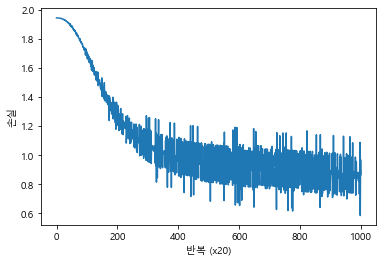

[[-1.172245    1.1978527  -1.1982734  -1.2169455  -1.1458375 ]
 [ 1.1890422  -1.2181973   1.1683445   1.193114    1.1412408 ]
 [-0.7475395   0.76213336 -0.7200326  -0.76171064 -0.8071745 ]
 [ 1.121449   -1.0240941   1.3474252   0.8337302   1.3457173 ]
 [-0.74593425  0.78157234 -0.7262256  -0.74533063 -0.82713956]
 [-1.1800985   1.1673465  -1.2047923  -1.2069288  -1.1333851 ]
 [ 0.85728353 -1.0536048   0.36022058  1.2903297   0.22793525]]
you [-1.172245   1.1978527 -1.1982734 -1.2169455 -1.1458375]
say [ 1.1890422 -1.2181973  1.1683445  1.193114   1.1412408]
goodbye [-0.7475395   0.76213336 -0.7200326  -0.76171064 -0.8071745 ]
and [ 1.121449  -1.0240941  1.3474252  0.8337302  1.3457173]
i [-0.74593425  0.78157234 -0.7262256  -0.74533063 -0.82713956]
hello [-1.1800985  1.1673465 -1.2047923 -1.2069288 -1.1333851]
. [ 0.85728353 -1.0536048   0.36022058  1.2903297   0.22793525]


In [19]:
import sys
sys.path.append('..')
from common.trainer import Trainer
from common.optimizer import Adam
from ch03.simple_cbow import SimpleCBOW #ch03 폴더의 simple_cbow.py 파일에 있는 SimpleCBOW 클래스 상속.
from common.util import preprocess, create_contexts_target, convert_one_hot

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()   #x축: iterations, y축: loss
#학습(반복)이 많아질수록 손실이 줄어든다.

#학습이 끝난 후의 가중치 매개변수 확인
#단어를 밀집벡터(=분산 표현)로 나타냄.

word_vecs = model.word_vecs
print(word_vecs)
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])